# Лабораторная работа №3

### Выполнить реализацию SGD в библиотеке numba и сравнить с реализацией в 1 лабораторной

In [1]:
from sklearn import datasets
from typing import Tuple, Mapping

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.animation as animation
import numpy as np
import math

### Функция Швефеля

$f(x, y) = x^2 + (x + y)^2 $, $x, y \in [-10, 10]$

Точка глобального экстремума:

$ min = (0, 0) $

Глобальный экстремум:

$ f(min) = 0$

In [2]:
def func_Shvefel(x: np.ndarray) -> np.float64:
    return x[0] * x[0] + (x[0] + x[1]) ** 2

def grad_Shvefel(x: np.ndarray) -> np.ndarray:
    return np.array([2 * x[0] + 2 * (x[0] + x[1]), 2 * (x[0] + x[1])])

In [3]:
def check_answer_Shvefel(x: np.ndarray, f_val: np.float32):
    '''
    x - the found minimum point
    f_val - value at found minimum point
    '''
    
    x_answer = np.array([0, 0])
    f_answer = 0
    print("Distance to the answer point", math.sqrt((x[0] - x_answer[0]) ** 2 + (x[1] - x_answer[1]) ** 2))
    print("Function value differece", f_val - f_answer)

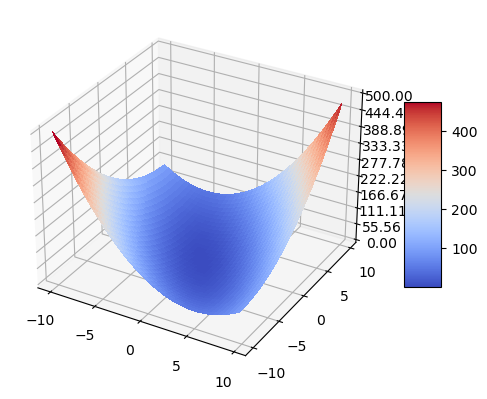

In [4]:
# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
Z = func_Shvefel(np.array([X, Y]))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### Мультифункция 

$f(x, y) = x * sin(4\pi x) + y * sin(4\pi y)$, $x, y \in [-2, 2]$



Точки глобального экстремума:

$ min_1 = (-1.6288, -1.6288) $

$ min_2 = (1.6288, 1.6288) $

$ min_3 = (-1.6288, 1.6288) $

$ min_4 = (1.6288, -1.6288) $

Глобальный экстремум:

$ f(min) = 4.2539$

In [5]:
def multi_func(x: np.ndarray) -> np.float64:
    return -x[0] * np.sin(4 * np.pi * x[0]) -x[1] * np.sin(4 * np.pi * x[1])

def grad_three_humped_func(x: np.ndarray) -> np.ndarray:
    return np.array([np.sin(4 * np.pi * x[0]) + x[0] * 4 * np.pi * np.cos(4 * np.pi * x[0]), np.sin(4 * np.pi * x[1]) + x[1] * 4 * np.pi * np.cos(4 * np.pi * x[1])])

In [6]:
def check_answer_multifunc(x: np.ndarray, f_val: np.float32):
    '''
    x - the found minimum point
    f_val - value at found minimum point
    '''
    
    x_list = [np.array([-1.6288, -1.6288]), np.array([-1.6288, 1.6288]),
                np.array([1.6288, -1.6288]), np.array([1.6288, 1.6288])]
    f_answer = -4.2539
    
    min_dist = min([math.sqrt((x[0] - x_answer[0]) ** 2 + (x[1] - x_answer[1]) ** 2) for x_answer in x_list])

    print("Distance to the answer point", min_dist)
    print("Function value differece", f_val - f_answer)

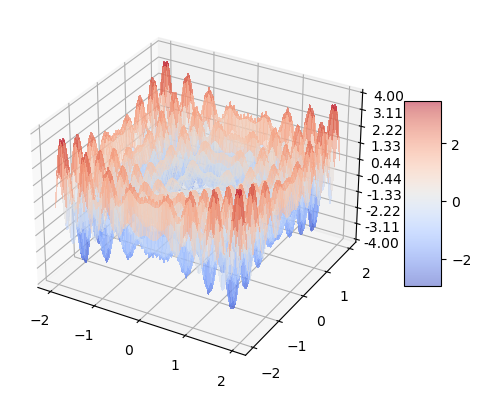

In [7]:
# Make data.
X = np.arange(-2, 2, 0.01)
Y = np.arange(-2, 2, 0.01)
X, Y = np.meshgrid(X, Y)
Z = multi_func(np.array([X, Y]))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.5)

# Customize the z axis.
ax.set_zlim(-4, 4)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### Градиентный спуск без numba

In [8]:
def my_GD(f: Mapping, df: Mapping, x0: np.ndarray, lr: float = 0.001, max_iter: int = 10000) -> tuple[np.ndarray, np.float32, np.ndarray]:
    '''
    f - optimized function
    df - derivative of the optimized function
    x0 - starting point
    lr - gradient descent step
    max_iter - maximum number of iterations
    
    Returns the minimum point, the value at that point, and the search history
    '''
    
    x_old = x0.copy()
    history = [np.array([x_old[0], x_old[1], f(x_old)])]
    for i in range(max_iter):
        x_new = x_old - lr * df(x_old)
        x_old = x_new
        history.append(np.array([x_new[0], x_new[1], f(x_new)]))

    return x_new, f(x_new), np.array(history)

### Замер времени

In [9]:
from datetime import datetime

In [14]:
start_time = datetime.now()
x, f_val, history = my_GD(func_Shvefel, grad_Shvefel, np.array([10, 10]), max_iter = 5000)
print("TIME WITHOUT NUMBA SHVEFEL\n", datetime.now() - start_time)

TIME WITHOUT NUMBA SHVEFEL
 0:00:00.038015


In [11]:
check_answer_Shvefel(x, f_val)

Distance to the answer point 0.07116800290254796
Function value differece 0.0019346137822891848


In [13]:
start_time = datetime.now()
x, f_val, history = my_GD(multi_func, grad_three_humped_func, np.array([0, 1]), max_iter = 5000)
print("TIME WITHOUT NUMBA MULTIFUNC\n", datetime.now() - start_time)

TIME WITHOUT NUMBA MULTIFUNC
 0:00:00.068128


In [18]:
check_answer_multifunc(x, f_val)

Distance to the answer point 1.791776227098685
Function value differece 5.132491627984786


### Реализация градиентного спуска через numba

In [15]:
import numba
from numba import jit

numba - компилятор питона лучше всего работает с кодом, использующим массивы NumPy, функции и циклы

njit - декоратор, аналогичный @jit(nopython=True). Функция компилируется в машинный код при первом вызове. Код будет выполняться полностью без участия интерпретатора Python.

modes:
- parallel = True - включение автоматического распараллеливания функции. Работает на CPU!
- fastmath = True - включение быстрого математического поведения для функции.


Сами функции нужно тоже вычислять на GPU

In [22]:
@numba.njit(fastmath=True)
def numba_func_Shvefel(x: np.ndarray) -> np.float64:
    return x[0] * x[0] + (x[0] + x[1]) ** 2

@numba.njit(fastmath=True)
def numba_grad_Shvefel_1(x: np.ndarray) -> np.float64:
    return 2 * x[0] + 2 * (x[0] + x[1])

@numba.njit(fastmath=True)
def numba_grad_Shvefel_2(x: np.ndarray) -> np.float64:
    return 2 * (x[0] + x[1])

In [26]:
@numba.njit(fastmath=True)
def numba_multi_func(x: np.ndarray) -> np.float64:
    return -x[0] * np.sin(4 * np.pi * x[0]) -x[1] * np.sin(4 * np.pi * x[1])

@numba.njit(fastmath=True)
def numba_grad_three_humped_func_1(x: np.ndarray) -> np.float64:
    return np.sin(4 * np.pi * x[0]) + x[0] * 4 * np.pi * np.cos(4 * np.pi * x[0])

@numba.njit(fastmath=True)
def numba_grad_three_humped_func_2(x: np.ndarray) -> np.float64:
    return np.sin(4 * np.pi * x[1]) + x[1] * 4 * np.pi * np.cos(4 * np.pi * x[1])

In [29]:
@numba.njit(fastmath=True)
def numba_GD(f: Mapping, df1: Mapping, df2: Mapping,x0: np.ndarray, lr: float = 0.001, max_iter: int = 10000) -> tuple[np.ndarray, np.float32]:
    '''
    f - optimized function
    df1 - 1 derivative of the optimized function
    df2 - 2 derivative of the optimized function
    x0 - starting point
    lr - gradient descent step
    max_iter - maximum number of iterations
    
    Returns the minimum point, the value at that point, and the search history
    '''
    
    x_old = x0
    x_new = x0
    history = [[x_old[0], x_old[1], f(x_old)]]
    for i in range(max_iter): #обычный range может быть заменен на numba.prange, если цикл нужно выполнять параллельно
        x_new[0] = x_old[0] - lr * df1(x_old)
        x_new[1] = x_old[1] - lr * df2(x_old)
        x_old = x_new
        history.append([x_new[0], x_new[1], f(x_new)])

    return x_new, f(x_new)

In [31]:
start_time = datetime.now()
x, f_val = numba_GD(numba_func_Shvefel, numba_grad_Shvefel_1,numba_grad_Shvefel_2 , np.array([0., 1.]), max_iter = 5000)
print("TIME WITH NUMBA SHVEFEL\n", datetime.now() - start_time)

TIME WITH NUMBA SHVEFEL
 0:00:00.002637


In [33]:
start_time = datetime.now()
x, f_val = numba_GD(numba_multi_func, numba_grad_three_humped_func_1, numba_grad_three_humped_func_2, np.array([0., 1.]), max_iter = 5000)
print("TIME WITH NUMBA MULTIFUNC\n", datetime.now() - start_time)

TIME WITH NUMBA MULTIFUNC
 0:00:00.003431


Результаты ровно на порядок быстрее